In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import tensorflow as tf
from keras import layers

In [57]:
from src.model import build

In [64]:
model = build()

In [63]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (32, 120, 120, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (32, 120, 120,    │      9,472 │ input_layer_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (32, 120, 120,    │        128 │ conv2d_60[0][0]   │
│ (GroupNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_58       │ (32, 120, 120,    │          0 │ group_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (32, 60, 60, 64)  │          0 │ activation_58[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (32, 60, 60, 64)  │     36,928 │ max_pooling2d_14… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (32, 60, 60, 64)  │        128 │ conv2d_61[0][0]   │
│ (GroupNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_59       │ (32, 60, 60, 64)  │          0 │ group_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (32, 60, 60, 64)  │     36,928 │ activation_59[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (32, 60, 60, 64)  │        128 │ conv2d_62[0][0]   │
│ (GroupNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (32, 60, 60, 64)  │          0 │ max_pooling2d_14… │
│                     │                   │            │ group_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_60       │ (32, 60, 60, 64)  │          0 │ add_26[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (32, 60, 60, 64)  │     36,928 │ activation_60[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (32, 60, 60, 64)  │        128 │ conv2d_63[0][0]   │
│ (GroupNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_61       │ (32, 60, 60, 64)  │          0 │ group_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (32, 60, 60, 64)  │     36,928 │ activation_61[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group_normalizatio… │ (32, 60, 60, 64)  │        128 │ conv2d_64[0][0]   │
│ (GroupNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_27 (Add)        │ (32, 60, 60, 64)  │          0 │ activation_60[0]… │
│                     │                   │            │ group_normalizat

 Total params: 11,089,554 (42.30 MB)

 Trainable params: 11,089,554 (42.30 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.loss

keras.src.losses.losses.SparseCategoricalCrossentropy

# Imports

In [69]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
def rotate_img(img, angle):
    if angle == 0:
        return img
    

In [25]:
import scipy as sp

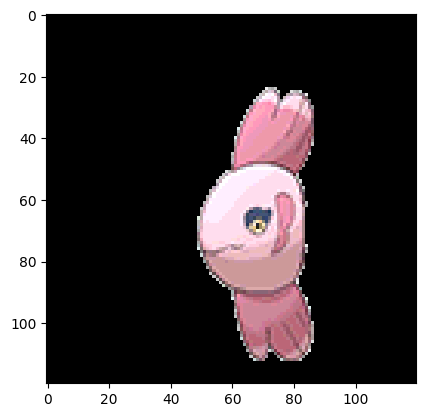

In [30]:
#i2 = sp.ndimage.rotate(img, 45, reshape=False)
i2 = sp.ndimage.shift(img, [10,10,0])
show_img(i2)

# Make resampler

In [10]:
from src.resample import ImageResampler2D

In [67]:
dummy_resampler = ImageResampler2D(
    random_rotation = 45,
    random_shift = 15,
    
    pipeline = [
        ['rotate', 999],
        ['shift', 999]
    ],
)

In [18]:
from src.image_utils import *

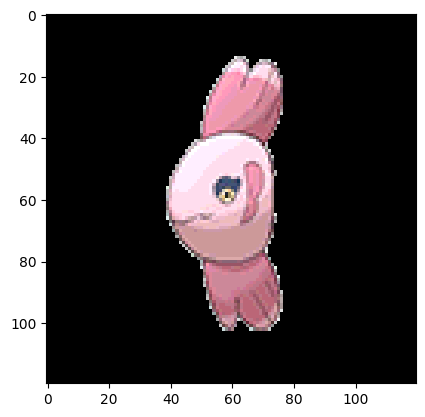

In [21]:
img = load_img()
show_img(img)

In [68]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

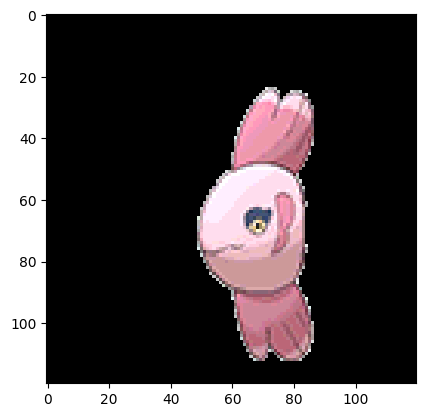

In [31]:
show_img(ImageResampler2D.shift_elem(img, [10,10]))

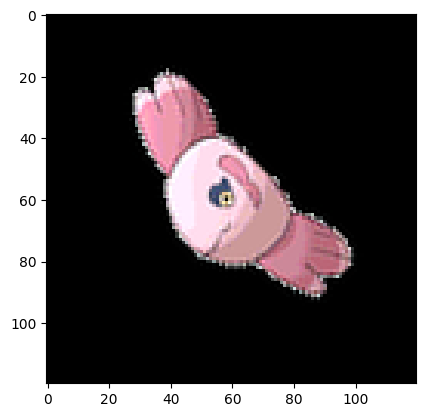

In [28]:
show_img(ImageResampler2D.rotate_elem(img, 45))

# Define model

In [6]:
from src.model import ResNet

In [12]:
m = ResNet('test', resampler=dummy_resampler)

In [69]:
imgs

NameError: name 'imgs' is not defined

In [71]:
from src.image_utils import *
imgs = [load_img(f) for f in os.listdir(DATA_DIR)]

In [72]:
tf.data.Dataset.from_tensors(imgs)

<_TensorDataset element_spec=TensorSpec(shape=(809, 120, 120, 3), dtype=tf.uint8, name=None)>

In [77]:
ds = tf.data.Dataset.from_tensors(imgs).unbatch()

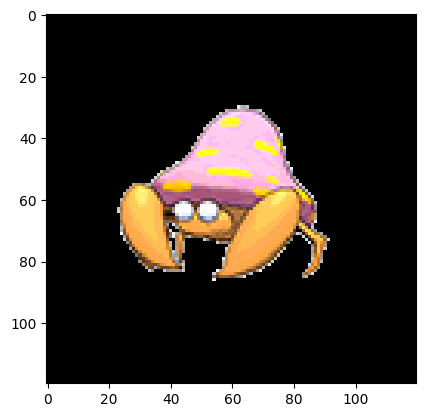

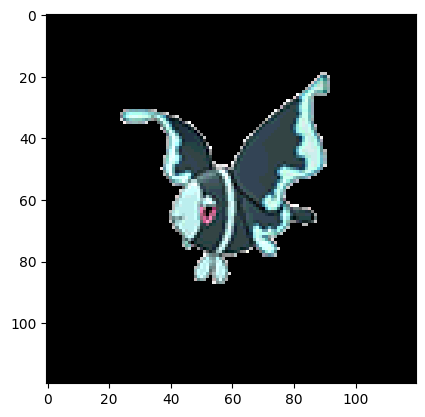

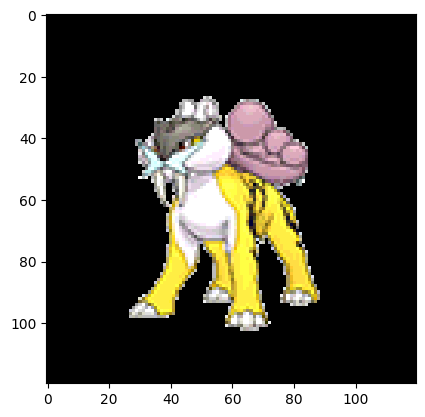

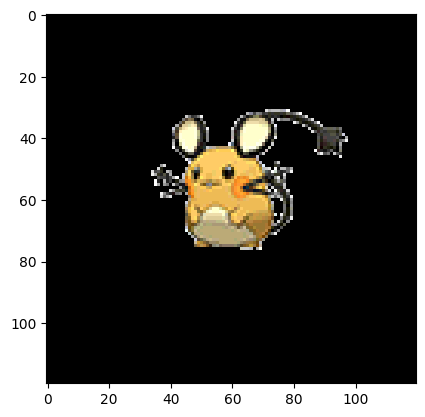

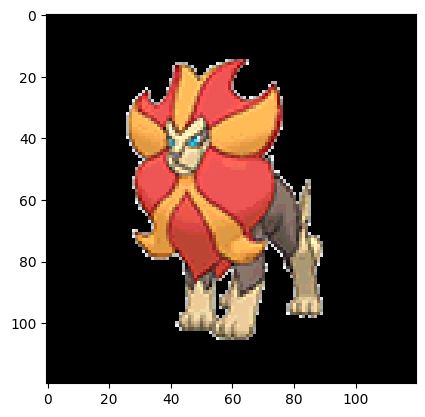

2024-08-21 13:16:58.303587: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [78]:
for img in ds.take(5):
    show_img(img)

In [79]:
img.shape

TensorShape([120, 120, 3])